In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Sentiment analysis/project 2024/Dataset-20231210T071705Z-001/Dataset/IMDB Dataset.csv')

In [3]:
from sklearn.preprocessing import LabelEncoder
df['sentiment'] = LabelEncoder().fit_transform(df['sentiment'])
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1
...,...,...
49995,I thought this movie did a down right good job...,1
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",0
49997,I am a Catholic taught in parochial elementary...,0
49998,I'm going to have to disagree with the previou...,0


In [4]:
from bs4 import BeautifulSoup
import re
from string import punctuation

def denoise(input_text: str) -> str:
    # To avoid warning in beautiful soup (The input looks more like a filename than markup)
    # when a text contains a /
    input_text="</br> "+input_text
    # Remove HTML markups
    soup = BeautifulSoup(input_text,features="html.parser")
    input_text = soup.get_text()
    # Removing the square brackets
    input_text = re.sub('\[[^]]*\]', '', input_text)
    # remove URLS
    input_text = re.sub(r'http\S+', '', input_text)
    # Remove special char
    input_text = input_text.translate(str.maketrans('', '', punctuation))
     # convert in lower case
    input_text = input_text.lower()
    return input_text

In [5]:
df['review'] = df['review'].apply(denoise)
df

,review,sentiment
0,one of the other reviewers has mentioned that...,1
1,a wonderful little production the filming tec...,1
2,i thought this was a wonderful way to spend t...,1
3,basically theres a family where a little boy ...,0
4,petter matteis love in the time of money is a...,1
...,...,...
49995,i thought this movie did a down right good jo...,1
49996,bad plot bad dialogue bad acting idiotic dire...,0
49997,i am a catholic taught in parochial elementar...,0
49998,im going to have to disagree with the previou...,0


In [6]:
df["word_count"] = df['review'].str.split().str.len()
df['average_word_len'] = df['review'].apply(lambda x: np.mean([len(w) for w in x.split()]))
df["nb_characters"] = df['review'].str.len()
df

,review,sentiment,word_count,average_word_len,nb_characters
0,one of the other reviewers has mentioned that...,1,301,4.534884,1666
1,a wonderful little production the filming tec...,1,156,5.006410,937
2,i thought this was a wonderful way to spend t...,1,162,4.401235,875
3,basically theres a family where a little boy ...,0,129,4.317829,689
4,petter matteis love in the time of money is a...,1,222,4.576577,1238
...,...,...,...,...,...
49995,i thought this movie did a down right good jo...,1,190,4.005263,951
49996,bad plot bad dialogue bad acting idiotic dire...,0,108,4.601852,605
49997,i am a catholic taught in parochial elementar...,0,225,4.435556,1224
49998,im going to have to disagree with the previou...,0,212,4.693396,1207


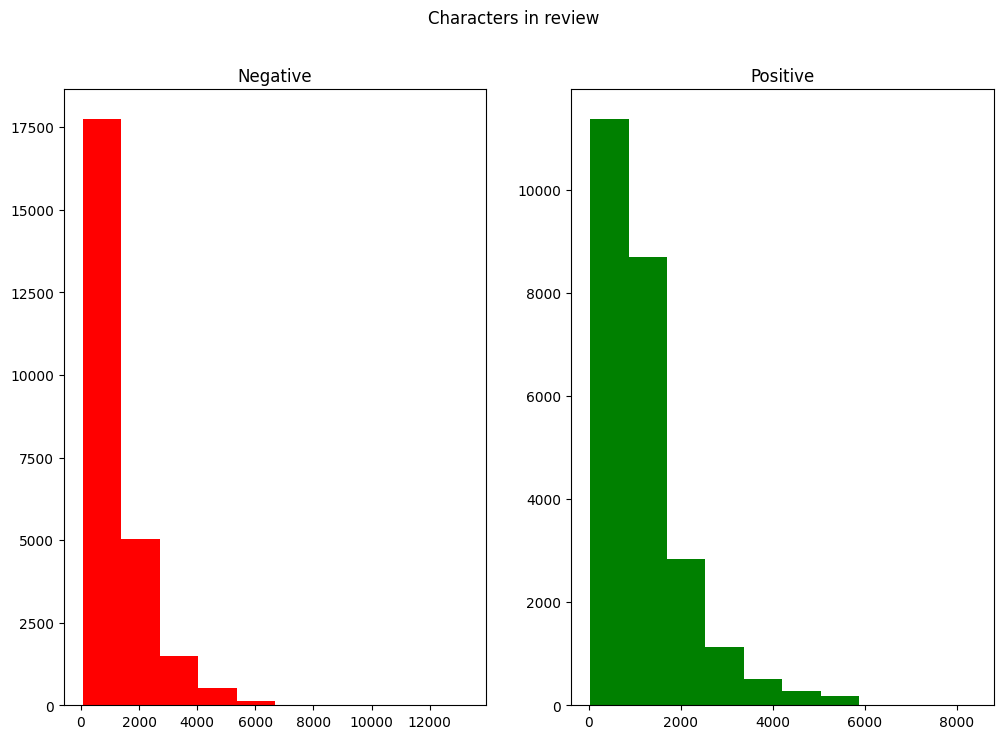

In [7]:
import matplotlib.pyplot as plt
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,8))
text_len=df[df['sentiment']==1]['nb_characters']
ax1.hist(text_len,color='red')
ax1.set_title('Negative')
text_len=df[df['sentiment']==0]['nb_characters']
ax2.hist(text_len,color='green')
ax2.set_title('Positive')
fig.suptitle('Characters in review')
plt.show()

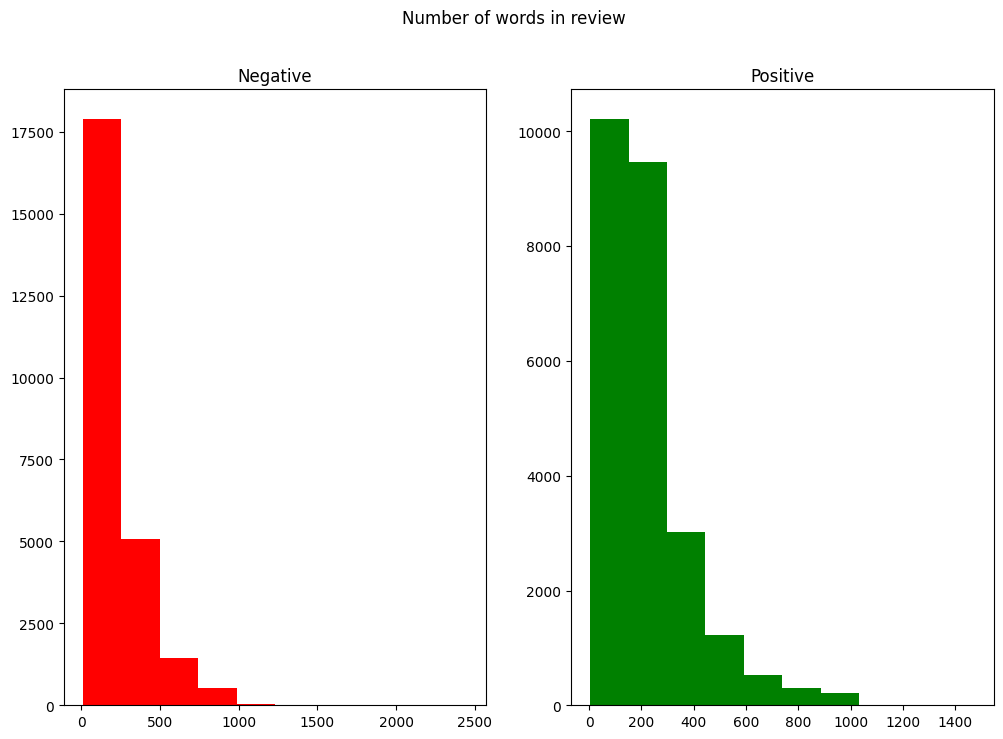

In [8]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,8))
text_len=df[df['sentiment']==1]['word_count']
ax1.hist(text_len,color='red')
ax1.set_title('Negative')
text_len=df[df['sentiment']==0]['word_count']
ax2.hist(text_len,color='green')
ax2.set_title('Positive')
fig.suptitle('Number of words in review')
plt.show()

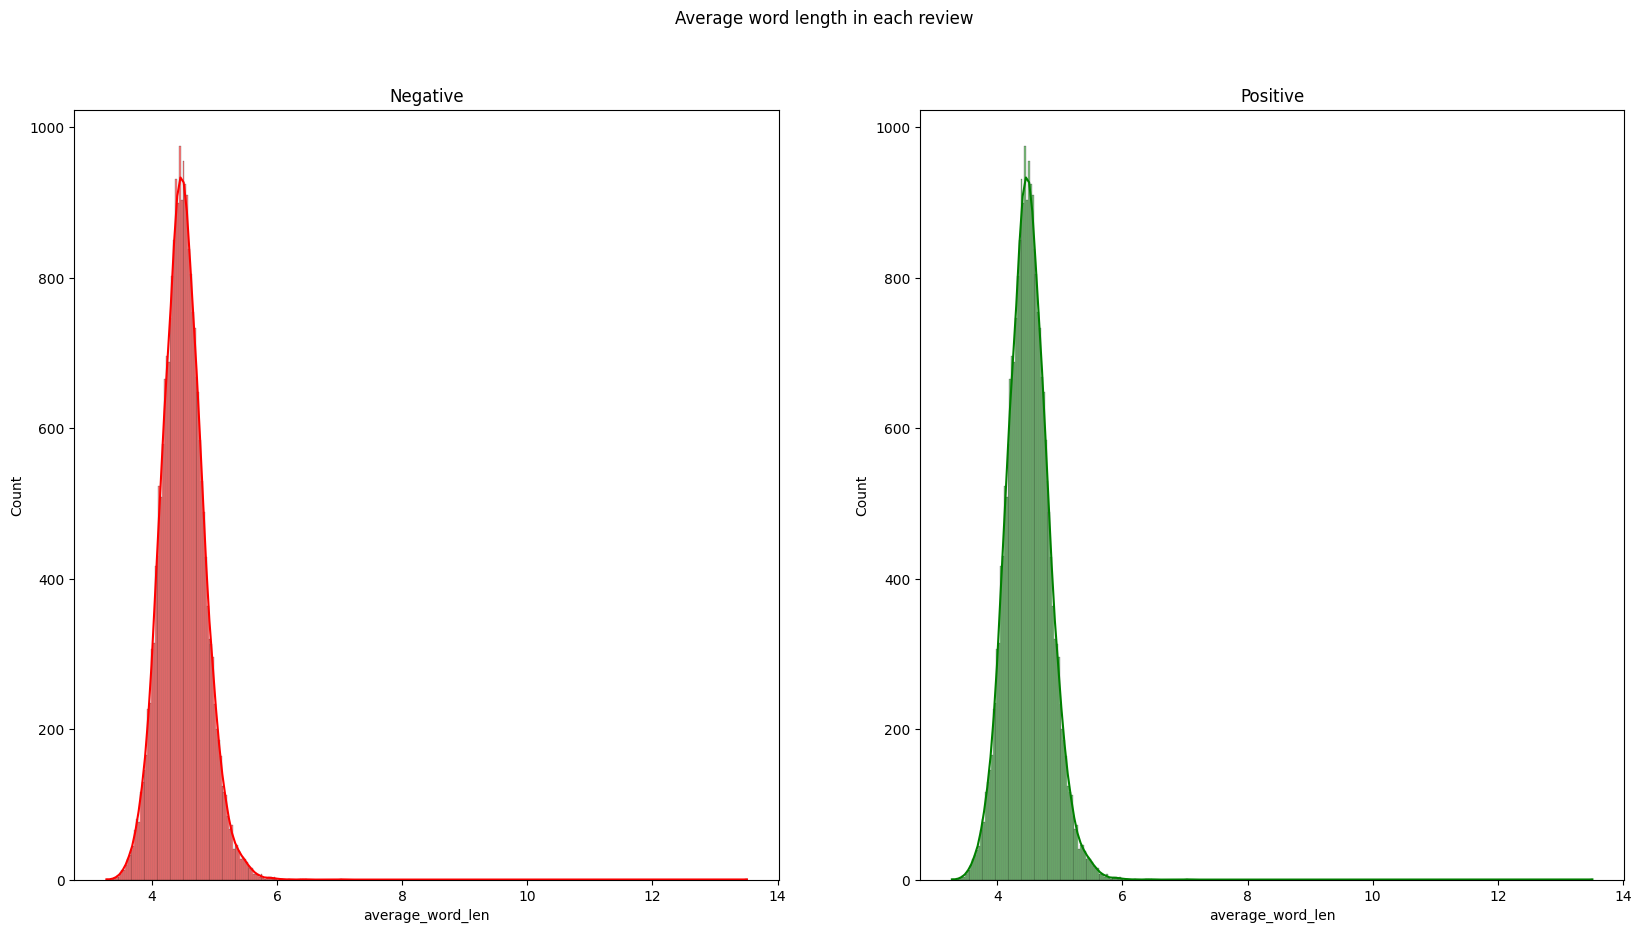

In [10]:
import pandas as pd
import warnings
import seaborn as sns

# Suppress FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Plotting
with pd.option_context('mode.use_inf_as_na', True):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
    sns.histplot(df[df['sentiment'] == 1]['average_word_len'], ax=ax1, color='red', kde=True)
    ax1.set_title('Negative')
    sns.histplot(df[df['sentiment'] == 1]['average_word_len'], ax=ax2, color='green', kde=True)
    ax2.set_title('Positive')
    fig.suptitle('Average word length in each review')

plt.show()

In [11]:
# Maximum number of charcaters in a review to run in model
MAX_REVIEW_LENGTH_SUPPORTED=1000

In [13]:
max_char_in_review=df["nb_characters"].max()
max_string_length=min(MAX_REVIEW_LENGTH_SUPPORTED,max_char_in_review)
number_of_reviews=len(df)
df_too_big=df[df["nb_characters"] > max_string_length]
number_of_too_big_negative=len(df_too_big[df_too_big['sentiment']==0])
number_of_too_big_positive=len(df_too_big[df_too_big['sentiment']==1])
print("Max number of characters in review :",max_char_in_review)
print("Max string lenght supported:",max_string_length)
print("Number of too long review in negative review {} on {}".format(number_of_too_big_negative,number_of_reviews))
print("Number of too long review in positive review {} on {}".format(number_of_too_big_positive,number_of_reviews))

Max number of characters in review : 13287
Max string lenght supported: 1000
Number of too long review in negative review 11221 on 50000
Number of too long review in positive review 11263 on 50000


In [14]:
df.drop(df_too_big.index , inplace=True)
nbv=df.groupby('sentiment').count()
nbv

,review,word_count,average_word_len,nb_characters
sentiment,,,,
0,13779,13779,13779,13779
1,13737,13737,13737,13737


In [15]:
from sklearn.model_selection import train_test_split
X_df=df["review"]
Y_df=df["sentiment"]
X_train, X_test, y_train, y_test = train_test_split(X_df,Y_df)
df_train = pd.concat([X_train, y_train], axis=1)
df_test = pd.concat([X_test, y_test], axis=1)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20637 entries, 49728 to 22692
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     20637 non-null  object
 1   sentiment  20637 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 483.7+ KB


In [16]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6879 entries, 9862 to 28072
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     6879 non-null   object
 1   sentiment  6879 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 161.2+ KB


In [17]:
VALIDATION_SPLIT=0.2

train_size = len(df_train)
df_train = df_train.iloc[:round(train_size * (1 - VALIDATION_SPLIT))]
df_validation = df_train.iloc[-round(train_size * VALIDATION_SPLIT):]

In [18]:
print("Number of samples in train data set: ",len(df_train))
print("Number of samples in validation data set: ",len(df_validation))

Number of samples in train data set:  16510
Number of samples in validation data set:  4127


In [19]:
import tensorflow_hub as hub
import tensorflow as tf
import tensorflow_text

ModuleNotFoundError: No module named 'tensorflow_text'

In [ ]:
PREPROCESS_URL ="https://www.kaggle.com/models/tensorflow/bert/frameworks/tensorFlow2/variations/en-uncased-preprocess/versions/3?tfhub-redirect=true"

In [ ]:
ENCODER_URL = "https://www.kaggle.com/models/tensorflow/bert/frameworks/tensorFlow2/variations/en-uncased-l-12-h-768-a-12/versions/4?tfhub-redirect=true"

In [ ]:
BERT_PREPROCESS = hub.KerasLayer(PREPROCESS_URL, name='bert-preprocess')
BERT_ENCODER = hub.KerasLayer(ENCODER_URL, name='bert-encoding')

In [20]:
from keras.layers import Layer
def encode_text(texts, tokenizer: Layer, encoder: Layer, encoder_key: str = "sequence_output"):
    embeddings = []
    input_ids = tokenizer(texts)
    outputs = encoder(input_ids)
    embeddings.append(outputs[encoder_key])
    return tf.concat(embeddings, axis=0)

In [22]:
import math

class TextEncoderDataGenerator(tf.keras.utils.Sequence):

    def __init__(self, df: pd.DataFrame, column_text: str,
                 tokenizer: Layer,
                 encoder: Layer,
                 column_label: str = None,
                 batch_size: int = None,
                 shuffle: bool = True,
                 encoder_key: str = "sequence_output"):
        self.data = df.copy()
        self.text_column = column_text
        self.text = self.data[self.text_column].values
        self.label_column = column_label
        if self.label_column is not None:
            self.label = self.data[self.label_column].values
        self.batch_size = batch_size
         #self.shuffle = shuffle
        self.tokenizer = tokenizer
        self.encoder = encoder
        self.encoder_key = encoder_key
        self.on_epoch_end()

    def __len__(self):
        if self.batch_size is None:
            return len(self.data)
        return math.ceil(len(self.text) / self.batch_size)
        def __getitem__(self, index):
        if self.batch_size is None:
            batch_text=self.text
        else:
             batch_text = self.text[index * self.batch_size: (index + 1) * self.batch_size]
        encoded_batch = encode_text(batch_text, tokenizer=self.tokenizer,
                                    encoder_key=self.encoder_key,
                                    encoder=self.encoder)
        if self.label_column is None:
            return encoded_batch
        if self.batch_size is None:
            batch_labels=self.label
        else:
            batch_labels = self.label[index * self.batch_size:
                                      (index + 1) * self.batch_size]
        batch_labels = batch_labels.reshape(-1, 1)
        return encoded_batch, batch_labels

    def on_epoch_end(self):
        if self.shuffle:
            self.data = self.data.sample(frac=1)
            self.text = self.data[self.text_column].values
            if self.label_column is not None:
                self.label = self.data[self.label_column].values

IndentationError: expected an indented block after function definition on line 29 (<ipython-input-22-54ad8a88409b>, line 30)

In [23]:
BATCH_SIZE=256

def get_generator(df, predict_mode=False):
    if predict_mode:
        column_label = None
        shuffle=False
    else:
        shuffle=True
        column_label = 'sentiment'
    return TextEncoderDataGenerator(df, column_text='review',
                                    tokenizer=BERT_PREPROCESS,
                                    encoder=BERT_ENCODER,
                                    column_label=column_label,
                                    shuffle=shuffle,
                                    batch_size=BATCH_SIZE)

In [24]:
train_generator = get_generator(df_train)
validation_generator = get_generator(df_validation)

NameError: name 'TextEncoderDataGenerator' is not defined

In [ ]:
train_generator = get_generator(df_train)
validation_generator = get_generator(df_validation)